### Array indexing

In [4]:
import numpy as np
import pandas as pd

In [4]:
data = pd.Series([100, 200, 300, 400],
                 index=['A', 'B', 'C', 'D'])
data

A    100
B    200
C    300
D    400
dtype: int64

In [5]:
data['A']

100

In [6]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [7]:
population['Texas']

26448193

In [8]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [9]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [11]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


### Detecting null values

In [15]:
data = pd.Series([1, np.nan, 'hello', None])

data.isnull()



0    False
1     True
2    False
3     True
dtype: bool

In [16]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [17]:
data.dropna()  #to drop numm values

0        1
2    hello
dtype: object

### Filling null values

In [18]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [19]:
data.fillna(0)  #replacaes null values with 0

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [20]:
data.fillna(method='ffill')  #Fills the null value with previous entry

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [21]:
data.fillna(method='bfill')  #Fills the null value with next entry

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

### Hierarchical Indexing

In [27]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [28]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [29]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [31]:
pop[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

### Joining

In [35]:

import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)



In [36]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [37]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [38]:


df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')



df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [39]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [44]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [45]:
ser.sum()

2.811925491708157

In [46]:
ser.mean()

0.5623850983416314

In [47]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [49]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [50]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

### Motivating pivot table

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [8]:
titanic.pivot_table('survived', index='sex', columns='class')   #Pivot table syntax

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
births = pd.read_csv(r'C:\Users\TANNAY\Desktop\births.csv')

In [8]:

births.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [9]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [10]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [12]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [13]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [14]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\TANNAY\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'mean births by day')

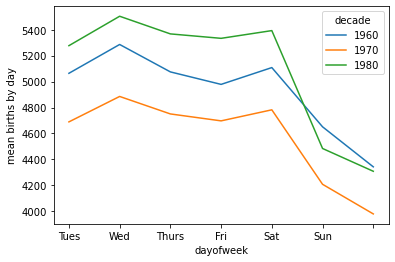

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

### Handle string in Pandas

In [16]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [18]:
monte.str.lower()   #string to lower case

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [20]:
monte.str.len()  #gives the string length

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [22]:
monte.str.startswith('T')  #returns a boolean value

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [23]:
monte.str.split()  #splits the string

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [25]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')  #starts and end in consonents
                                            #start string ^ and end string $

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [26]:
monte.str[0:3] # gives string with first 3 letters

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [27]:
monte.str.split().str.get(-1)  #splits the string and takes the last name

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

# Time Series

In [28]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [30]:


from dateutil import parser
date = parser.parse("4th of July, 2015")
date



datetime.datetime(2015, 7, 4, 0, 0)

In [31]:
date.strftime('%A')   #prints the day of the weeek

'Saturday'

In [32]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [33]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data  #indexing

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [36]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [1]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

5.2 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Columnwise operation in PandaS

In [5]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.101812,0.298283,0.636572
1,0.435671,0.220578,0.990797
2,0.654224,0.820193,0.904737
3,0.137785,0.155398,0.307140
4,0.921909,0.707242,0.528478


In [6]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [7]:


result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)



True

In [8]:
df.head()

,A,B,C
0,0.101812,0.298283,0.636572
1,0.435671,0.220578,0.990797
2,0.654224,0.820193,0.904737
3,0.137785,0.155398,0.307140
4,0.921909,0.707242,0.528478


In [9]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.101812,0.298283,0.636572,0.628515
1,0.435671,0.220578,0.990797,0.662344
2,0.654224,0.820193,0.904737,1.629663
3,0.137785,0.155398,0.307140,0.954558
4,0.921909,0.707242,0.528478,3.082725


In [10]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.101812,0.298283,0.636572,-0.308641
1,0.435671,0.220578,0.990797,0.217091
2,0.654224,0.820193,0.904737,-0.183444
3,0.137785,0.155398,0.307140,-0.057344
4,0.921909,0.707242,0.528478,0.406198
